# Project 4

# Preparing data

In [2]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['USERPROFILE']
# print("- Your Home Folder is: " + home_folder)


In [3]:
## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')

- Your Downloads folder is 'C:\Users\verya\Downloads/'



In [4]:
## DO NOT CHANGE THIS CELL
if RAW_FILE == r"YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable in the previous cell to match your local filepath.")
	
RAW_FILE

'C:\\Users\\verya\\Downloads\\Crimes_-_2001_to_Present_20231026.csv'

In [5]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'D:\Github\Repos\-Core--Project-4\Data'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [6]:
import pandas as pd

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,1930689,HH109118,01/05/2002 09:24:00 PM,007XX E 103 ST,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,...,NaN,NaN,06,NaN,NaN,2002,02/04/2016 06:33:39 AM,NaN,NaN,NaN
2,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,NaN,NaN,2023,09/14/2023 03:43:09 PM,NaN,NaN,NaN
3,13210088,JG423627,08/31/2023 12:00:00 PM,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,...,27.0,28.0,11,1160870.0,1898642.0,2023,09/16/2023 03:41:56 PM,41.877565,-87.684791,"(41.877565108, -87.68479102)"
4,13210004,JG422532,07/24/2023 09:45:00 PM,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,7.0,43.0,02,1190812.0,1856743.0,2023,09/16/2023 03:41:56 PM,41.761919,-87.576209,"(41.7619185, -87.576209245)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7920298,13047495,JG229914,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
7920299,13168300,JG373901,08/07/2023 06:00:00 PM,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
7920300,13114024,JG309527,06/20/2023 07:00:00 PM,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
7920301,13188860,JG398340,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [7]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
56810,1310741,G001135,01/01/2001 01:00:00 PM,047XX N ELSTON AV,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,...,NaN,08B,1145613.0,1931427.0,2001,08/17/2015 03:03:40 PM,41.967833,-87.739978,"(41.96783306, -87.739978195)",2001-01-01 01:00:00
75911,1311144,G001320,01/01/2001 01:00:00 AM,063XX N LEAVITT ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1160455.0,1942042.0,2001,08/17/2015 03:03:40 PM,41.996666,-87.685110,"(41.99666603, -87.685109858)",2001-01-01 01:00:00
3049226,5462733,HN290220,01/01/2001 01:00:00 AM,058XX S INDIANA AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,40.0,20,1178551.0,1866538.0,2001,04/25/2007 05:57:12 AM,41.789084,-87.620849,"(41.789084341, -87.620849345)",2001-01-01 01:00:00
147932,1315987,G001152,01/01/2001 01:00:00 AM,009XX N HUDSON AV,1310,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,...,NaN,14,1173036.0,1906862.0,2001,08/17/2015 03:03:40 PM,41.899860,-87.639877,"(41.899860332, -87.63987705)",2001-01-01 01:00:00
94917,1325760,G001074,01/01/2001 01:00:00 PM,029XX S CALIFORNIA AV,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,...,NaN,18,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32351,13251091,JG468931,10/18/2023 12:00:00 AM,073XX S SOUTH SHORE DR,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,...,43.0,10,1195265.0,1857288.0,2023,10/25/2023 03:42:43 PM,41.763305,-87.559871,"(41.763305308, -87.559870854)",2023-10-18 12:00:00
32748,13247047,JG468005,10/18/2023 12:00:00 AM,019XX N WESTERN AVE,0560,ASSAULT,SIMPLE,CTA STATION,False,False,...,22.0,08A,1160062.0,1912639.0,2023,10/25/2023 03:42:43 PM,41.915991,-87.687371,"(41.915990756, -87.687370839)",2023-10-18 12:00:00
32540,13249969,JG471502,10/18/2023 12:00:00 AM,100XX W OHARE ST,0810,THEFT,OVER $500,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,False,False,...,76.0,06,1100658.0,1934241.0,2023,10/25/2023 03:42:43 PM,41.976290,-87.905227,"(41.976290414, -87.905227221)",2023-10-18 12:00:00
32070,13254110,JG476467,10/18/2023 12:00:00 AM,005XX W 36TH ST,1780,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,APARTMENT,False,False,...,60.0,20,NaN,NaN,2023,10/25/2023 03:42:43 PM,NaN,NaN,NaN,2023-10-18 12:00:00


In [8]:
chicago_full['Datetime'].dt.year

56810      2001
75911      2001
3049226    2001
147932     2001
94917      2001
           ... 
32351      2023
32748      2023
32540      2023
32070      2023
32498      2023
Name: Datetime, Length: 7920303, dtype: int64

In [9]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486808
2001    485893
2003    475986
2004    469423
2005    453774
2006    448179
2007    437091
2008    427185
2009    392826
2010    370517
2011    351997
2012    336325
2013    307542
2014    275796
2016    269839
2017    269111
2018    268926
2015    264801
2019    261369
2022    239008
2020    212236
2021    208919
2023    206752
Name: Year, dtype: int64

In [10]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [11]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,2001,41.967833,-87.739978
2001-01-01 01:00:00,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,2001,41.996666,-87.685110
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849
2001-01-01 01:00:00,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,2001,41.899860,-87.639877
2001-01-01 01:00:00,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,2001,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-18 12:00:00,13251091,10/18/2023 12:00:00 AM,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,334,3.0,7.0,2023,41.763305,-87.559871
2023-10-18 12:00:00,13247047,10/18/2023 12:00:00 AM,ASSAULT,SIMPLE,CTA STATION,False,False,1434,14.0,1.0,2023,41.915991,-87.687371
2023-10-18 12:00:00,13249969,10/18/2023 12:00:00 AM,THEFT,OVER $500,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,False,False,1651,16.0,41.0,2023,41.976290,-87.905227


In [12]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [13]:
FINAL_DROP = ['Year']

In [14]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to D:\Github\Repos\-Core--Project-4\Data
- Succesfully saved D:\Github\Repos\-Core--Project-4\DataChicago-Crime_2001.csv
- Succesfully saved D:\Github\Repos\-Core--Project-4\DataChicago-Crime_2002.csv
- Succesfully saved D:\Github\Repos\-Core--Project-4\DataChicago-Crime_2003.csv
- Succesfully saved D:\Github\Repos\-Core--Project-4\DataChicago-Crime_2004.csv
- Succesfully saved D:\Github\Repos\-Core--Project-4\DataChicago-Crime_2005.csv
- Succesfully saved D:\Github\Repos\-Core--Project-4\DataChicago-Crime_2006.csv
- Succesfully saved D:\Github\Repos\-Core--Project-4\DataChicago-Crime_2007.csv
- Succesfully saved D:\Github\Repos\-Core--Project-4\DataChicago-Crime_2008.csv
- Succesfully saved D:\Github\Repos\-Core--Project-4\DataChicago-Crime_2009.csv
- Succesfully saved D:\Github\Repos\-Core--Project-4\DataChicago-Crime_2010.csv
- Succesfully saved D:\Github\Repos\-Core--Project-4\DataChicago-Crime_2011.csv
- Succesfully saved D:\Github\Repos\-Core--Project-4\DataChic

In [15]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2001.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2002.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2003.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2004.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2005.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2006.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2007.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2008.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2009.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2010.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2011.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2012.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2013.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChicago-Crime_2014.csv',
 'D:\\Github\\Repos\\-Core--Project-4\\DataChica

In [16]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



In [17]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,41.967833,-87.739978
1,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685110
2,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
3,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,41.899860,-87.639877
4,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
206747,13251091,10/18/2023 12:00:00 AM,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,334,3.0,7.0,41.763305,-87.559871
206748,13247047,10/18/2023 12:00:00 AM,ASSAULT,SIMPLE,CTA STATION,False,False,1434,14.0,1.0,41.915991,-87.687371
206749,13249969,10/18/2023 12:00:00 AM,THEFT,OVER $500,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,False,False,1651,16.0,41.0,41.976290,-87.905227
206750,13254110,10/18/2023 12:00:00 AM,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,APARTMENT,False,False,915,9.0,11.0,NaN,NaN


In [18]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485893
2002    486808
2003    475986
2004    469423
2005    453774
2006    448179
2007    437091
2008    427185
2009    392826
2010    370517
2011    351997
2012    336325
2013    307542
2014    275796
2015    264801
2016    269839
2017    269111
2018    268926
2019    261369
2020    212236
2021    208919
2022    239008
2023    206752
Name: Date, dtype: int64

# Part 1

## Topic 1) How do crime rates differ between police districts?

- Which district has the most crimes? Which has the least?

In [19]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,41.967833,-87.739978
1,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685110
2,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
3,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,41.899860,-87.639877
4,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN


In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Group data by 'District' and count the number of crimes
district_crime_counts = df.groupby('District').size()


In [22]:
# Identify district with most and least crimes
most_crimes_district = district_crime_counts.idxmax()
least_crimes_district = district_crime_counts.idxmin()
print(f"District {most_crimes_district} has the most crimes with {district_crime_counts[most_crimes_district]} crimes.")
print(f"District {least_crimes_district} has the least crimes with {district_crime_counts[least_crimes_district]} crimes.")

District 8.0 has the most crimes with 531893 crimes.
District 21.0 has the least crimes with 4 crimes.


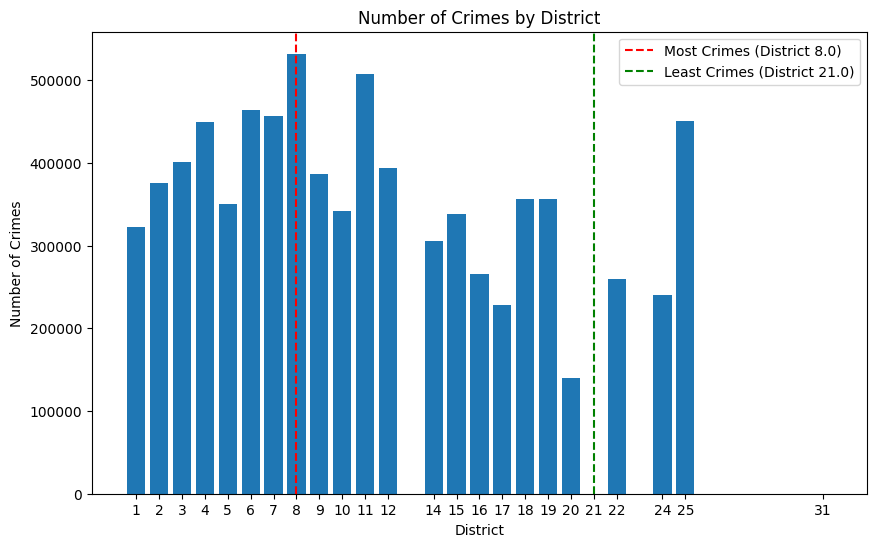

In [23]:
# Group data by 'District' and count the number of crimes
district_crime_counts = df['District'].value_counts().reset_index()
district_crime_counts.columns = ['District', 'Crime Count']

# Identify district with most and least crimes
most_crimes_district = district_crime_counts['District'].iloc[0]
least_crimes_district = district_crime_counts['District'].iloc[-1]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(district_crime_counts['District'], district_crime_counts['Crime Count'])
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by District')

# Highlight the district with most and least crimes
plt.axvline(x=most_crimes_district, color='red', linestyle='--', label=f'Most Crimes (District {most_crimes_district})')
plt.axvline(x=least_crimes_district, color='green', linestyle='--', label=f'Least Crimes (District {least_crimes_district})')

plt.xticks(district_crime_counts['District'])
plt.legend()
plt.show()

## Topic 2) How have crime rates changed over 20 years?

- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g. decreasing when overall crime is increasing or vice-versa)?

In [24]:
import matplotlib.pyplot as plt

In [25]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [27]:
# Create a time series of daily crime counts
daily_crime_counts = df.resample('D').size()

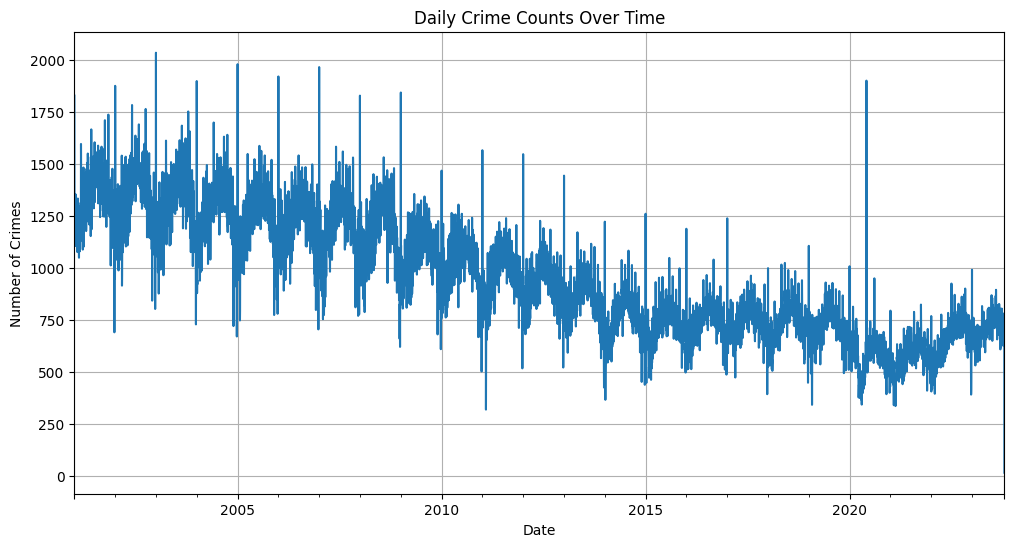

In [28]:
# Plot the daily crime counts
plt.figure(figsize=(12, 6))
daily_crime_counts.plot(kind='line')
plt.title('Daily Crime Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

In [29]:
# Determine if overall crimes are increasing or decreasing
if daily_crime_counts.iloc[-1] > daily_crime_counts.iloc[0]:
    print("The total number of crimes has been increasing over the time period.")
else:
    print("The total number of crimes has been decreasing over the time period.")


The total number of crimes has been decreasing over the time period.


In [30]:
# Identify individual crimes that are doing the opposite of the overall trend
opposite_trend_crimes = []

for crime in df['Primary Type'].unique():
    crime_data = df[df['Primary Type'] == crime]
    daily_counts = crime_data.resample('D').size()
    if daily_counts.iloc[-1] > daily_counts.iloc[0] and daily_crime_counts.iloc[-1] < daily_crime_counts.iloc[0]:
        opposite_trend_crimes.append(crime)
    elif daily_counts.iloc[-1] < daily_counts.iloc[0] and daily_crime_counts.iloc[-1] > daily_crime_counts.iloc[0]:
        opposite_trend_crimes.append(crime)

print("\nThe crimes that are showing the opposite trend are:")
for crime in opposite_trend_crimes:
    print(crime)


The crimes that are showing the opposite trend are:
MOTOR VEHICLE THEFT
INTERFERENCE WITH PUBLIC OFFICER
HOMICIDE
STALKING
INTIMIDATION


## Topic 5) How has the variance in crime changed over the years?

- Use differencing to show this.
- Resample to the frequency that best shows the differences in variance
- Plot the results.
- Report your conclusions

In [31]:
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 13:00:00,1310741,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,41.967833,-87.739978
2001-01-01 01:00:00,1311144,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685110
2001-01-01 01:00:00,5462733,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
2001-01-01 01:00:00,1315987,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,41.899860,-87.639877
2001-01-01 13:00:00,1325760,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN


In [32]:
annual_counts =  df.groupby('Primary Type').resample('Y').sum()

C:\Users\verya\AppData\Local\Temp\ipykernel_16408\4092744748.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_counts =  df.groupby('Primary Type').resample('Y').sum()
C:\Users\verya\AppData\Local\Temp\ipykernel_16408\4092744748.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_counts =  df.groupby('Primary Type').resample('Y').sum()
C:\Users\verya\AppData\Local\Temp\ipykernel_16408\4092744748.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns

In [33]:
df_unstack = annual_counts.copy()
df_unstack = annual_counts.unstack(0)


<Figure size 1200x600 with 0 Axes>

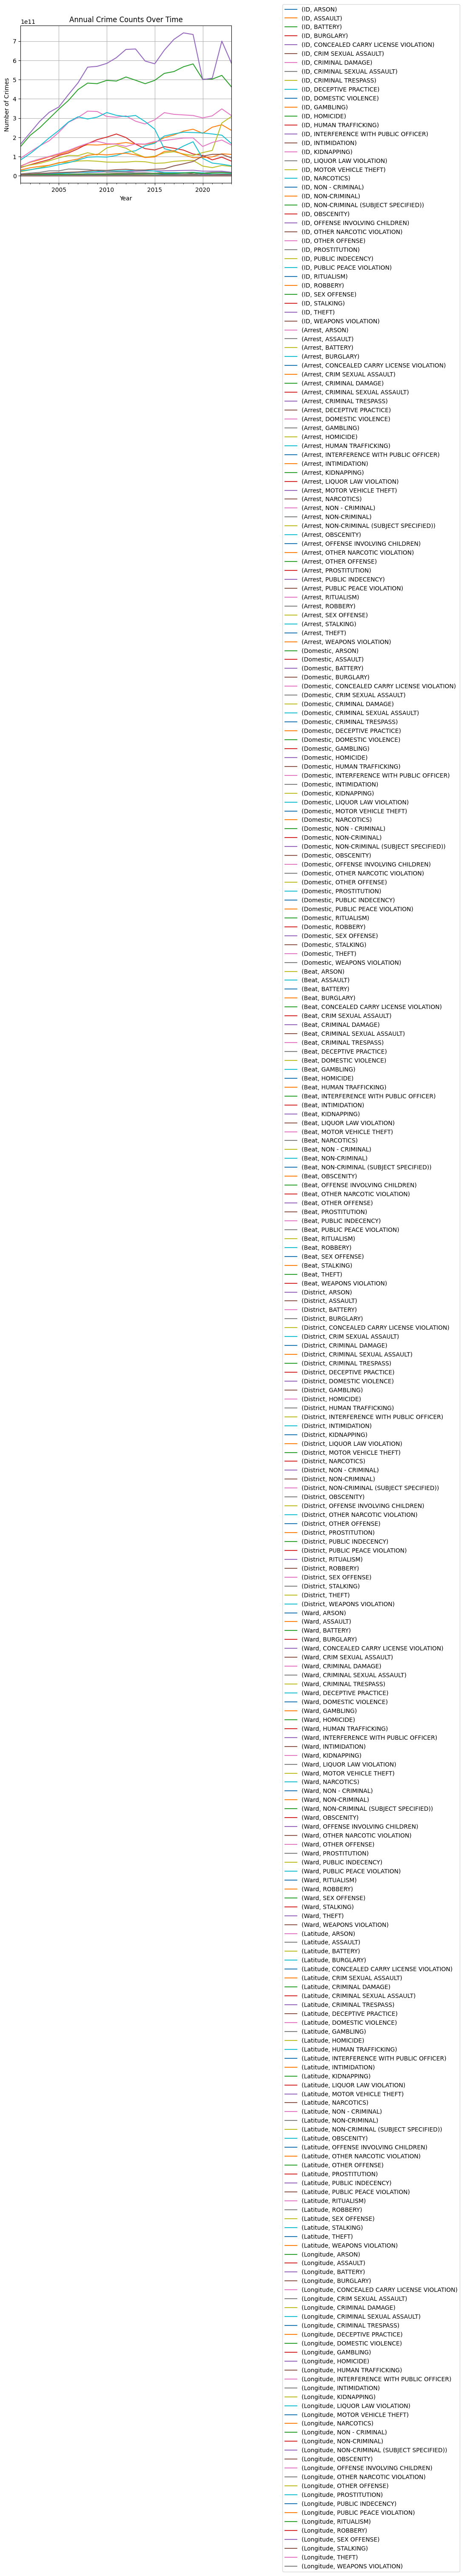

In [34]:
# Plot the annual crime counts
plt.figure(figsize=(12, 6))
df_unstack.plot()
plt.title('Annual Crime Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)

plt.legend(loc='upper right', bbox_to_anchor=(1.75, 1), bbox_transform=plt.gcf().transFigure)

plt.show()


In [35]:
# Apply differencing
differences = df_unstack.diff().dropna()


In [36]:
# Calculate variance for each year
variances = differences.rolling(window=2).var().dropna()


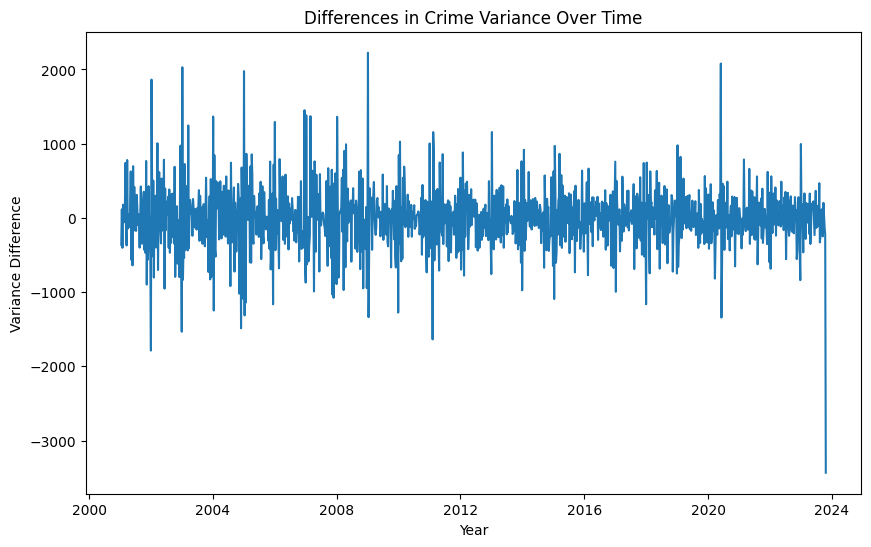

In [39]:
crimes = df.resample('W').size()

crimes_diff = crimes.diff()

plt.figure(figsize=(10, 6))
plt.plot(crimes_diff)
plt.title('Differences in Crime Variance Over Time')
plt.xlabel('Year')
plt.ylabel('Variance Difference')
plt.show()

- The variance in crime has fluctuated over the years. There is no clear trend of consistent increase or decrease. The variance differences spike both above and below the zero line, indicating periods when crime variability increased and decreased relative to some baseline or comparison year.

Tableau: https://public.tableau.com/app/profile/yaman.shadid/viz/DashboardsProject_16995945577270/ProjectDashboard2?publish=yes